## Exploratory Data Analysis



This notebook contains EDA on the OU learning analytics dataset: 
* The dataset is available at https://analyse.kmi.open.ac.uk/open_dataset
* The data is described in the notbook: [Data description](00_data_description.ipynb)
* The data has been processed as described in the notebook: [Data preparation](01_data.ipynb)

* No `prediction_point` has been set - which including as many rows as possible, as per preprocessing.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# load preprocessed data from csv file
ou_student = pd.read_csv('../../data/final_model_ALL_20230526.csv')

### Size and Shape of the Dataset

In [8]:
# first few rows of the data
ou_student.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,submission_distance,stu_activity_count,stu_activity_type_count,stu_total_clicks,stu_days_active,mod_pres_vle_type_count,year,month,subject,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,...,265.0,196.0,6.0,934.0,40.0,9.0,2013,Oct,SocSci,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,...,265.0,430.0,7.0,1435.0,80.0,9.0,2013,Oct,SocSci,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,...,0.0,76.0,6.0,281.0,12.0,9.0,2013,Oct,SocSci,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,...,265.0,663.0,8.0,2158.0,123.0,9.0,2013,Oct,SocSci,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,...,265.0,352.0,7.0,1034.0,70.0,9.0,2013,Oct,SocSci,Pass


#### Rows and Columns

In [9]:

# number of rows and columns
print(" Number of rows: ",ou_student.shape[0],"\n","Number of columns: ", ou_student.shape[1])


 Number of rows:  31437 
 Number of columns:  28


#### Summary statistics (numerical)

In [10]:
# numerical summary of the data
print(ou_student.describe())


         id_student  num_of_prev_attempts  studied_credits  course_length  \
count  3.143700e+04          31437.000000     31437.000000   31437.000000   
mean   7.064173e+05              0.164424        79.721984     256.015650   
std    5.497398e+05              0.482322        41.022786      13.177689   
min    3.733000e+03              0.000000        30.000000     234.000000   
25%    5.075230e+05              0.000000        60.000000     241.000000   
50%    5.897680e+05              0.000000        60.000000     262.000000   
75%    6.441010e+05              0.000000       120.000000     268.000000   
max    2.698591e+06              6.000000       655.000000     269.000000   

       date_registration  date_unregistration  prop_submissions     avg_score  \
count       31437.000000         31437.000000      31437.000000  31437.000000   
mean          -69.831981           206.270191          0.534951     40.171405   
std            49.199856           115.247259          0.385368

#### Column dataframe information

In [11]:
# dataframe information
ou_student.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31437 entries, 0 to 31436
Data columns (total 28 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   code_module                                 31437 non-null  object 
 1   code_presentation                           31437 non-null  object 
 2   id_student                                  31437 non-null  int64  
 3   gender                                      31437 non-null  object 
 4   region                                      31437 non-null  object 
 5   highest_education                           31437 non-null  object 
 6   imd_band                                    31437 non-null  object 
 7   age_band                                    31437 non-null  object 
 8   num_of_prev_attempts                        31437 non-null  int64  
 9   studied_credits                             31437 non-null  int64  
 10  disability

#### Column data types

In [12]:
# data types of columns
column_types = ou_student.dtypes

# count the data types
type_counts = column_types.value_counts()

print(type_counts)

object     11
float64    10
int64       5
bool        2
dtype: int64


#### Curriculum data

In [16]:
# curriculum summary

# modules in the dataset
print('There are', len(ou_student['code_module'].unique()), 'modules in the dataset.\n')

# modules and their associated subjects
for module in ou_student['code_module'].unique():
    subject = ou_student.loc[ou_student['code_module'] == module, 'subject'].iloc[0]

    print('Module:', module, '- Subject:', subject)



There are 7 modules in the dataset.

Module: AAA - Subject: SocSci
Module: BBB - Subject: SocSci
Module: CCC - Subject: Stem
Module: DDD - Subject: Stem
Module: EEE - Subject: Stem
Module: FFF - Subject: Stem
Module: GGG - Subject: SocSci


In [17]:


# intake months in the dataset
print('There are', len(ou_student['month'].unique()), 'intakes in the dataset.\n')

# intake months for each module
for module in ou_student['code_module'].unique():
    months = ou_student.loc[ou_student['code_module'] == module, 'month'].unique()
    print('Module:', module, '- Intake:', ', '.join(months))



There are 2 intakes in the dataset.

Module: AAA - Intake: Oct
Module: BBB - Intake: Feb, Oct
Module: CCC - Intake: Feb, Oct
Module: DDD - Intake: Feb, Oct
Module: EEE - Intake: Oct, Feb
Module: FFF - Intake: Feb, Oct
Module: GGG - Intake: Oct, Feb


In [18]:


# intake years in the dataset
print('There are', len(ou_student['year'].unique()), 'years in the dataset.\n')

# intake year for each module
for module in ou_student['code_module'].unique():
    years = ou_student.loc[ou_student['code_module'] == module, 'year'].unique()
    years = [str(year) for year in years]  # Convert years to strings
    print('Module:', module, '- Year:', ', '.join(years))



There are 2 years in the dataset.

Module: AAA - Year: 2013, 2014
Module: BBB - Year: 2013, 2014
Module: CCC - Year: 2014
Module: DDD - Year: 2013, 2014
Module: EEE - Year: 2013, 2014
Module: FFF - Year: 2013, 2014
Module: GGG - Year: 2013, 2014


In [19]:


# combinations of code_module and code_presentation
combinations = ou_student.groupby(['code_module', 'code_presentation']).size().reset_index(name='count')
for index, row in combinations.iterrows():
    module = row['code_module']
    presentation = row['code_presentation']
    count = row['count']
    print('Module:', module, '- Presentation:', presentation, '- Count:', count)


Module: AAA - Presentation: 2013J - Count: 368
Module: AAA - Presentation: 2014J - Count: 357
Module: BBB - Presentation: 2013B - Count: 1745
Module: BBB - Presentation: 2013J - Count: 2219
Module: BBB - Presentation: 2014B - Count: 1595
Module: BBB - Presentation: 2014J - Count: 2278
Module: CCC - Presentation: 2014B - Count: 1823
Module: CCC - Presentation: 2014J - Count: 2349
Module: DDD - Presentation: 2013B - Count: 1238
Module: DDD - Presentation: 2013J - Count: 1853
Module: DDD - Presentation: 2014B - Count: 1167
Module: DDD - Presentation: 2014J - Count: 1719
Module: EEE - Presentation: 2013J - Count: 998
Module: EEE - Presentation: 2014B - Count: 676
Module: EEE - Presentation: 2014J - Count: 1141
Module: FFF - Presentation: 2013B - Count: 1516
Module: FFF - Presentation: 2013J - Count: 2181
Module: FFF - Presentation: 2014B - Count: 1423
Module: FFF - Presentation: 2014J - Count: 2264
Module: GGG - Presentation: 2013J - Count: 949
Module: GGG - Presentation: 2014B - Count: 83

The above is the breakdown of when the 7 modules were offered across two intake months and two years.  I have been considering how to use this information in the model and how to split the dataset.  

One approach is to use the 2013 data for training and the 2014 data for testing.  This would be a good way to test the model's ability to predict the future - as in a real world scenario.

However, the this means that some modules would be excluded from the training set:

*  Module CCC only has 2014 data
*  Module EEE only have 2013J data 
*  Module GGG only has 2013J data
 
 Obviously, if this approach is used, then a few considerations and decisions need to be made.  
 
 * The model could be generalisable to exclude module information as predictor features.  This means that the model would predict outcomes for students on any module, even those not included in the training set. 

* The model could include module information as predictor variables, but it means predictions cannot be made for students who are registered on modules which were not in the training set, perhaps by intake month.  For example, if the model is trained on 2013 data, then predictions cannot be made for students on module CCC or February intakes for modules EEE and GGG.  
 
TO BE CONSIDERED...

This has been considered - for the purposes of this coursework, the model will be trained on 2013 data and tested on 2014 data.  Module information (module code, module presentation) will not be included as predictor variables which means that the model will focus on student behaviour and possibly some characteristics.

There are some interesting assumptions - that engagement behaviour alone is enough to predict student outcomes.  This is not necessarily true, but it is a good starting point.  


#### Students

In [38]:
# number of students
print('There are',len(ou_student.id_student.unique()),'students in the dataset with a total of',len(ou_student),'registrations.')


There are 27784 students in the dataset with a total of 31437 registrations.


### Distributions



#### Overall by Outcome

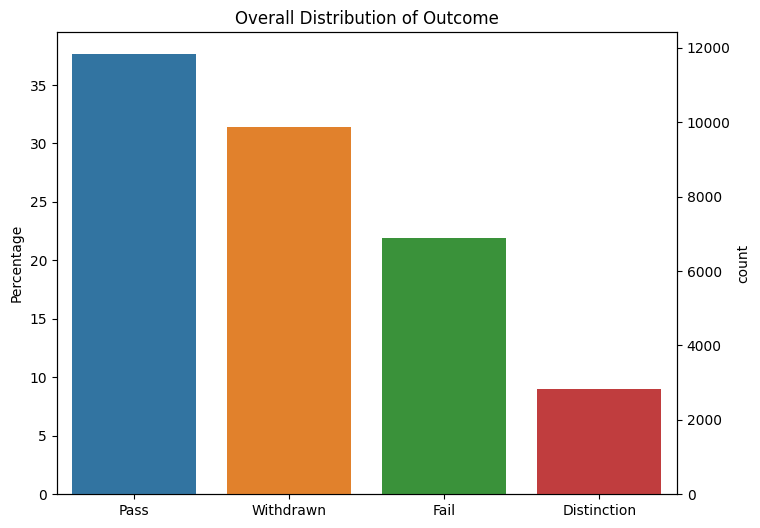

                 Outcome  Count  Percentage
Pass                Pass  11829   37.627636
Withdrawn      Withdrawn   9881   31.431116
Fail                Fail   6902   21.955021
Distinction  Distinction   2825    8.986226


In [60]:
import seaborn as sns

# percentage distribution of 'final_result'
percentage_distribution = ou_student['final_result'].value_counts(normalize=True) * 100

# overall distribution of 'final_result'
plt.figure(figsize=(8, 6))

# left y-axis for the barplot
ax1 = plt.gca()
ax1.set_ylabel('Percentage')

sns.barplot(x=percentage_distribution.index, y=percentage_distribution.values, ax=ax1)

# right y-axis for the countplot
ax2 = ax1.twinx()
ax2.set_ylabel('Count')

sns.countplot(data=ou_student, x='final_result', ax=ax2)

plt.title('Overall Distribution of Outcome')
plt.xlabel('Final Outcome')
plt.show()

# table with the numbers and percentages
outcome_table = pd.DataFrame({'Outcome': percentage_distribution.index, 'Count': ou_student['final_result'].value_counts(), 'Percentage': percentage_distribution.values})

print(outcome_table)


Approximately 378% of students `Pass` with an additional 9% achieving `Distinction`.  A signification proportion of students withdraw - areound 31% and 22% fail.

Thus we can see that there is an impetus to tackle withdrawals and failure as early as possible.  For the HE institution these impact income, reputation, league-scores, value for money, etc.  For the student, there may be financial impacts as well as the impact on their future career and life goals.

#### Gender and Disability

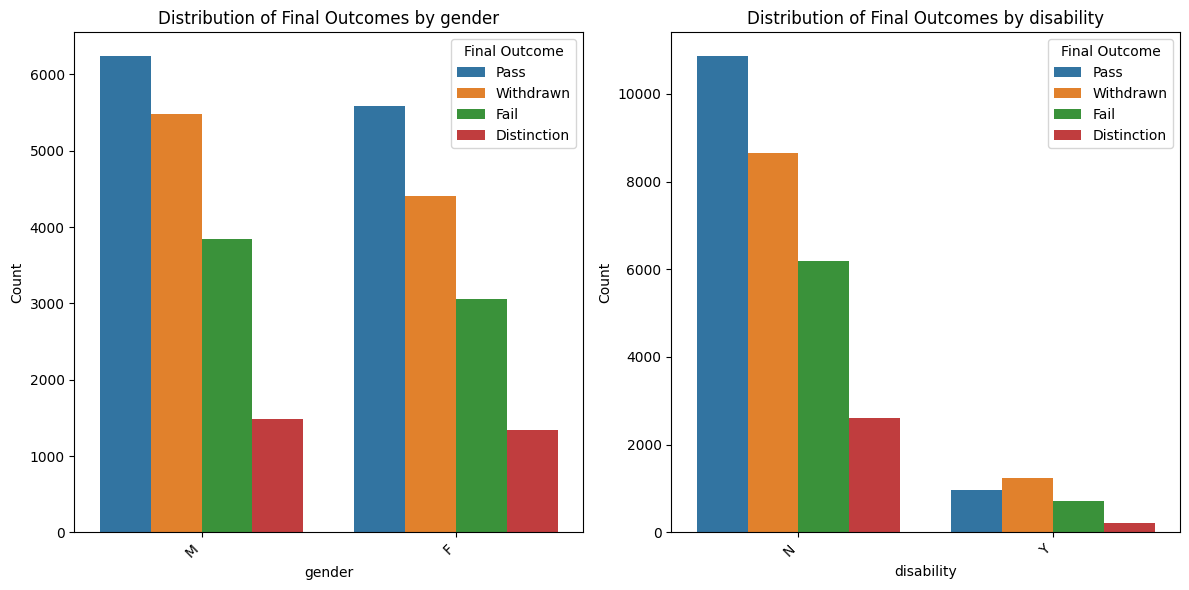

In [59]:

# demographics to plot
demographics = ['gender', 'disability']

# rows and columns for the subplot grid
n_rows = 1
n_cols = 2

# new figure 
plt.figure(figsize=(12, 6))

# iterate over the demographics
for i, demographic in enumerate(demographics):
    # calculate the subplot index
    subplot_idx = i + 1
    
    # create the subplot
    plt.subplot(n_rows, n_cols, subplot_idx)
    
    # plot the countplot for the current demographic
    sns.countplot(data=ou_student, x=demographic, hue='final_result')
    
    # set the title, labels, and legend
    plt.title(f'Distribution of Final Outcomes by {demographic}')
    plt.xlabel(demographic)
    plt.ylabel('Count')
    plt.legend(title='Final Outcome')
    
    # rotate the x-labels
    plt.xticks(rotation=45, ha='right')

# tight layout
plt.tight_layout()

# show the plots
plt.show()



Outcome by gender is very similar.

When it comes to disability, there appear to be more withdrawals within students who have declared a disability.  

This could be interesting to explore - is there anything to this? 

#### Age, IMD, Region, Highest Education

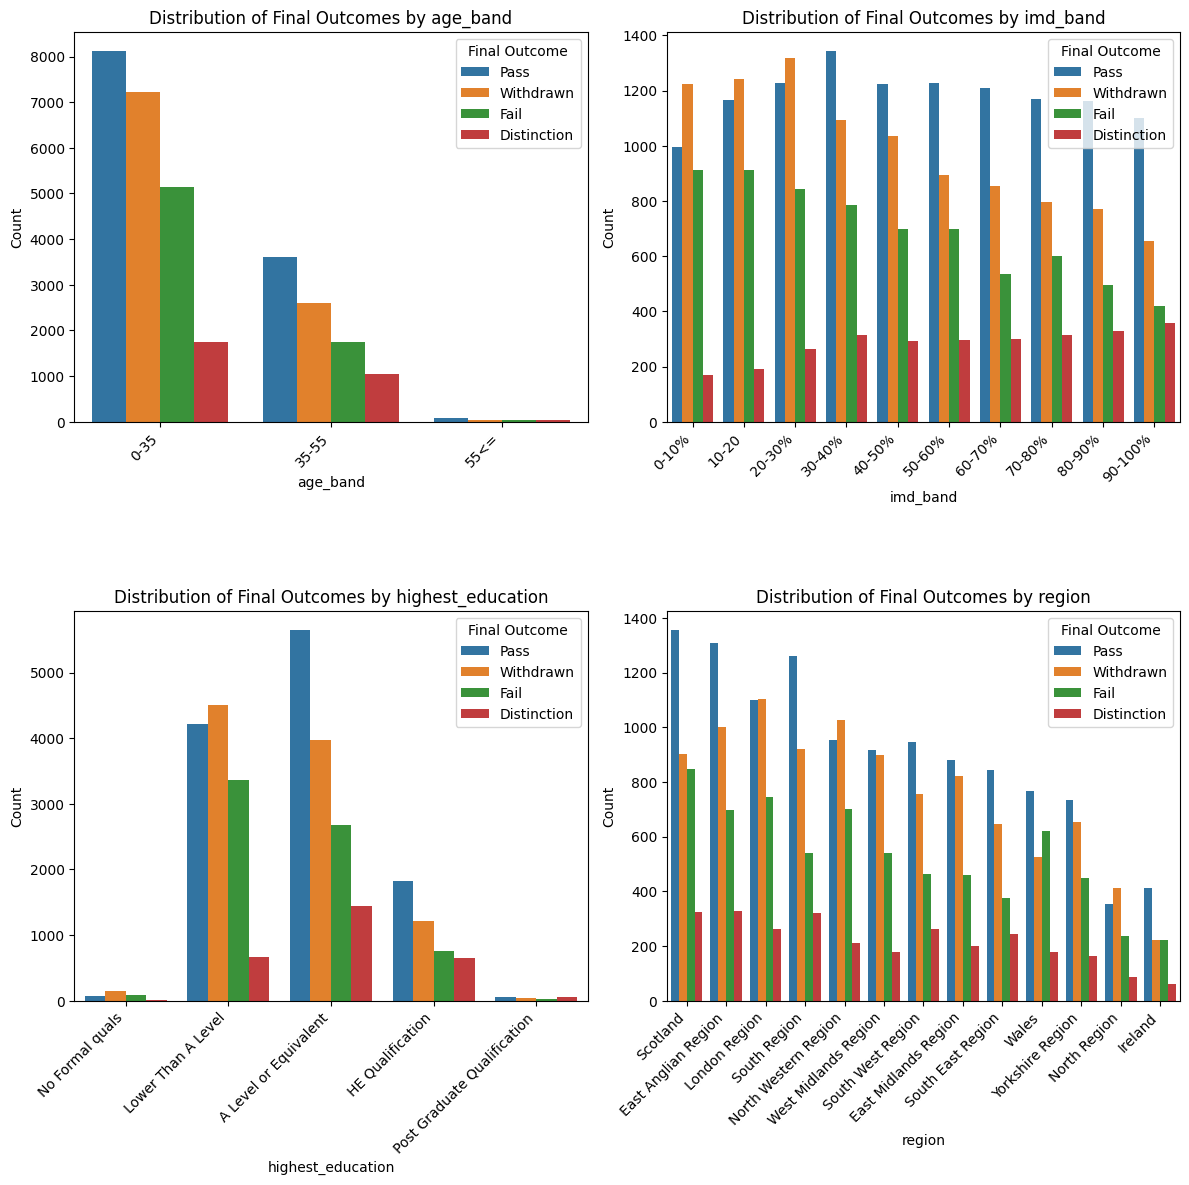

In [62]:

# order for variables
age_band_order = ['0-35', '35-55', '55<=']
imd_band_order = ['0-10%', '10-20', '20-30%', '30-40%', '40-50%', '50-60%', '60-70%', '70-80%', '80-90%', '90-100%']  # data creators left off a % sign!
highest_education_order = ['No Formal quals', 'Lower Than A Level', 'A Level or Equivalent',
                           'HE Qualification', 'Post Graduate Qualification']
region_order = ou_student['region'].value_counts().index.tolist()

# demographics to plot
demographics = ['age_band', 'imd_band', 'highest_education', 'region']

# rows and columns for the subplot grid
n_rows = 3
n_cols = 2

# calculate the total number of subplots
n_plots = len(demographics)

# calculate the number of required figures
n_figures = int((n_plots - 1) / (n_rows * n_cols)) + 1

# iterate over the figures
for f in range(n_figures):
    # create a new figure
    plt.figure(figsize=(12, 16))
    
    # starting and ending indices for the subplots in the current figure
    start_idx = f * n_rows * n_cols
    end_idx = min((f + 1) * n_rows * n_cols, n_plots)
    
    # iterate over the subplots in the current figure
    for i, demographic in enumerate(demographics[start_idx:end_idx]):
        # calculate the subplot index within the current figure
        subplot_idx = i + 1
        
        # create the subplot
        plt.subplot(n_rows, n_cols, subplot_idx)
        
        # plot the countplot for the current demographic
        if demographic == 'age_band':
            sns.countplot(data=ou_student, x=demographic, hue='final_result', order=age_band_order)
        elif demographic == 'imd_band':
            sns.countplot(data=ou_student, x=demographic, hue='final_result', order=imd_band_order)
        elif demographic == 'highest_education':
            sns.countplot(data=ou_student, x=demographic, hue='final_result', order=highest_education_order)
        elif demographic == 'region':
            sns.countplot(data=ou_student, x=demographic, hue='final_result', order=region_order)
        
        # set the title, labels, and legend
        plt.title(f'Distribution of Final Outcomes by {demographic}')
        plt.xlabel(demographic)
        plt.ylabel('Count')
        plt.legend(title='Final Outcome')
        
        # rotate the x-labels
        plt.xticks(rotation=45, ha='right')
        
    # tight layout
    plt.tight_layout()
    
    # show
    plt.show()



There are many fewer older students, which is to be expected.

* Older students are less likely to withdraw, more likely to pass and signficantly more likely to achieve a distinction.
  
There are observable patterns in the IMD bands: 
* the withdrawal proportion declines as a student's IMD band increases
* the fail proportion decreases as a student's IMD band increases
* the distinction proportion increases as a student's IMD band increases
* the pass proportion tends to decline as the student's IMD band increases

It seems that students from less deprived areas have better outcomes.

Most students have some form of education between lower than A-level and HE qualificatoin.  The withdrawal rate is highest for those iwth no formal qualification or lower than A level.  Post Graduate Qualified studnes have the highest distinction proportion.

There is some variability across regions.  I am not looking at this in detail in this project, so will not explore this further.

I expect that 'student profiles' could be interesting to explore in terms of their engagement and outcomes. 

In [64]:


# count and percentage distribution of 'final_result' by 'age_band'
outcome_table = ou_student.groupby(['age_band', 'final_result']).size().unstack(fill_value=0)
outcome_table['Total'] = outcome_table.sum(axis=1)
outcome_table = outcome_table.apply(lambda row: row / row['Total'] * 100, axis=1)
outcome_table = outcome_table.drop('Total', axis=1)
outcome_table = outcome_table.rename(columns=lambda x: f'{x} (%)')

# outcome table
print(outcome_table)



final_result  Distinction (%)   Fail (%)   Pass (%)  Withdrawn (%)
age_band                                                          
0-35                 7.878052  23.072081  36.557399      32.492468
35-55               11.501278  19.357706  40.137793      29.003223
55<=                19.095477  14.572864  43.718593      22.613065


### Distribution of Outcomes by 'Study History'

In [65]:
ou_student.columns

Index(['code_module', 'code_presentation', 'id_student', 'gender', 'region',
       'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'disability', 'course_length', 'date_registration',
       'date_unregistration', 'unregistration_before_registration',
       'unregistration_before_registration_14_days', 'prop_submissions',
       'avg_score', 'submission_distance', 'stu_activity_count',
       'stu_activity_type_count', 'stu_total_clicks', 'stu_days_active',
       'mod_pres_vle_type_count', 'year', 'month', 'subject', 'final_result'],
      dtype='object')

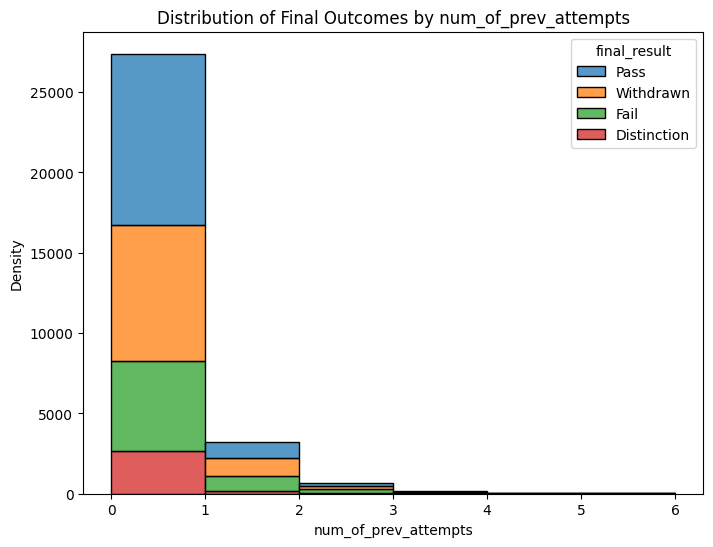

In [66]:
# distributions by study history
history = 'num_of_prev_attempts'

plt.figure(figsize=(8, 6))
sns.histplot(data=ou_student, x=history, hue='final_result', multiple='stack', binwidth=1)
plt.title(f'Distribution of Final Outcomes by {history}')
plt.xlabel(history)
plt.ylabel('Density')
    
plt.show()

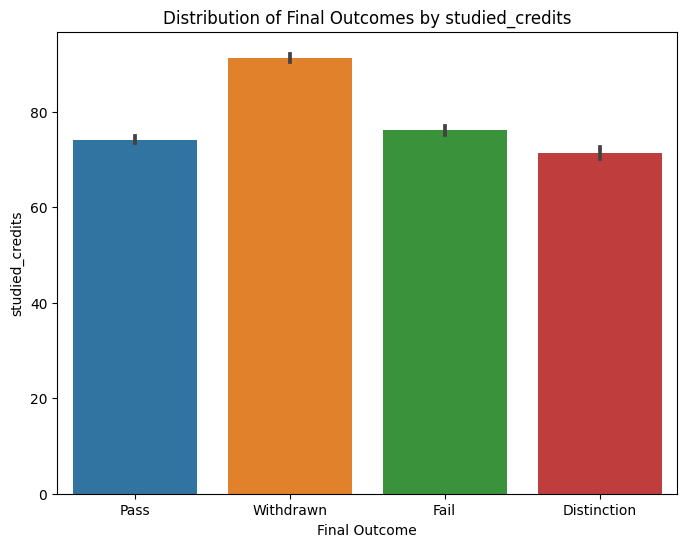

In [69]:
# bar plot for studied_credits
plt.figure(figsize=(8, 6))

sns.barplot(data=ou_student, x='final_result', y='studied_credits')

plt.title('Distribution of Final Outcomes by studied_credits')
plt.xlabel('Final Outcome')
plt.ylabel('studied_credits')

plt.show()


One might think that previous attempts and credits studied would have an impact on outcome.  The vast majority of students have single attempts so this variable is not so interesting.  

In terms of studied credits, it seems that students who end up withdrawing have higher 'studied_credits' while the other three outcomes are very similar.  

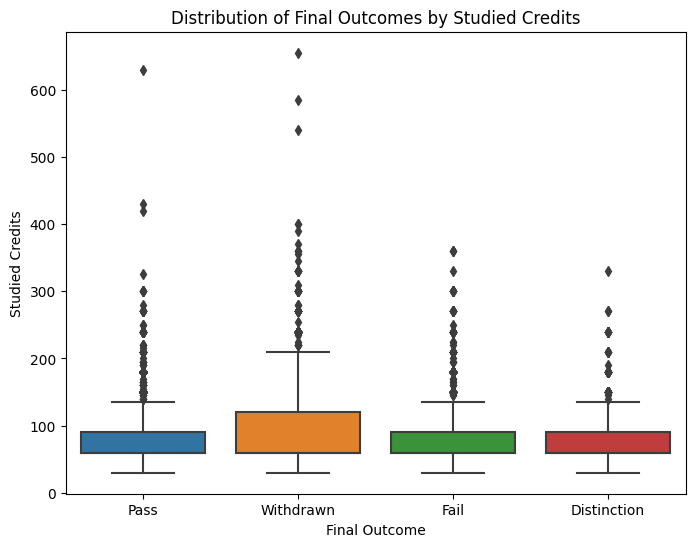

In [71]:

# box plot for studied_credits
plt.figure(figsize=(8, 6))

sns.boxplot(data=ou_student, x='final_result', y='studied_credits')

plt.title('Distribution of Final Outcomes by Studied Credits')
plt.xlabel('Final Outcome')
plt.ylabel('Studied Credits')

plt.show()



#### Date of Registration

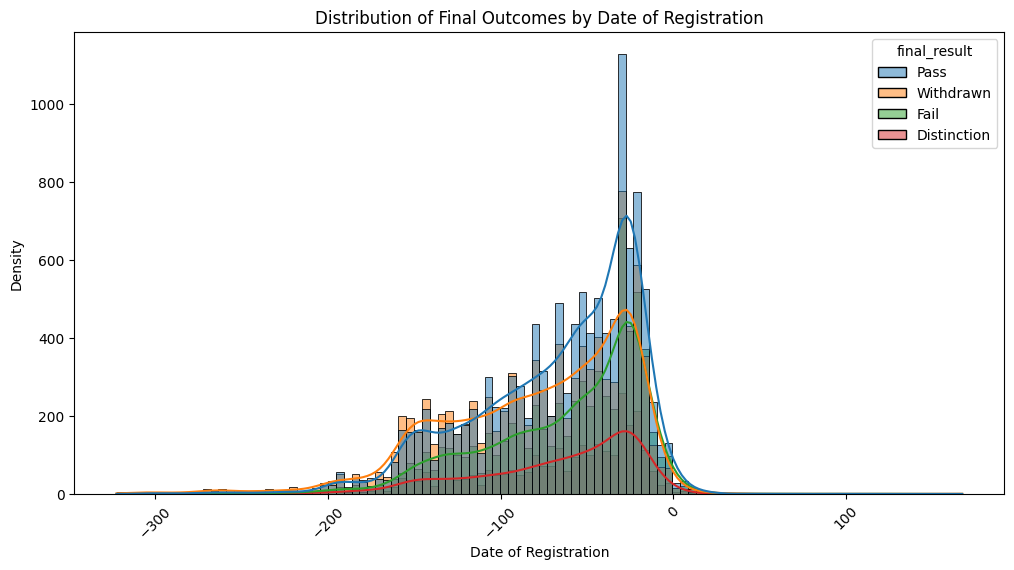

In [ ]:

# distributions by date of registration
plt.figure(figsize=(12, 6))
sns.histplot(data=ou_student, x='date_registration', hue='final_result', kde=True)
plt.title('Distribution of Final Outcomes by Date of Registration')
plt.xlabel('Date of Registration')
plt.ylabel('Density')

plt.xticks(rotation=45)
plt.show()


Text(0.5, 1.0, 'Distribution of Registrations')

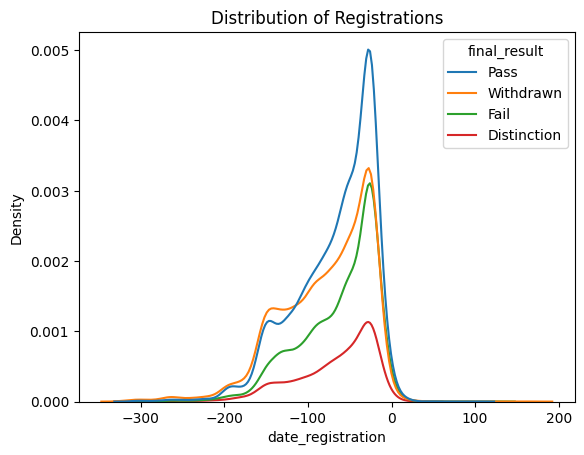

In [72]:
sns.kdeplot(data=ou_student, 
            x='date_registration', 
            hue = 'final_result').set_title('Distribution of Registrations')

Date of registration ranges from well in advance of the start of course to a few weeks into the course.  The distributions between outcomes has similar shapes.  

There is some evidence that those who registered very early are more likely to withdraw - the orange tips and bump in the orange line, although this is evident in the passing students too.

#### Distributions by Curriculum

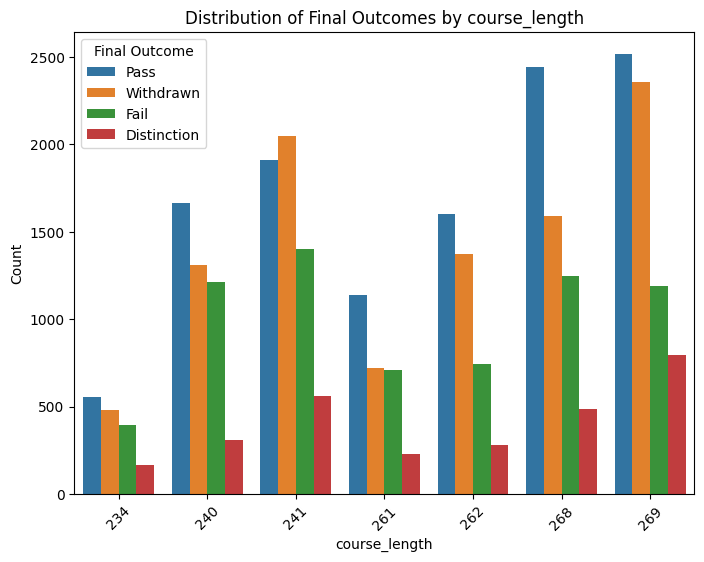

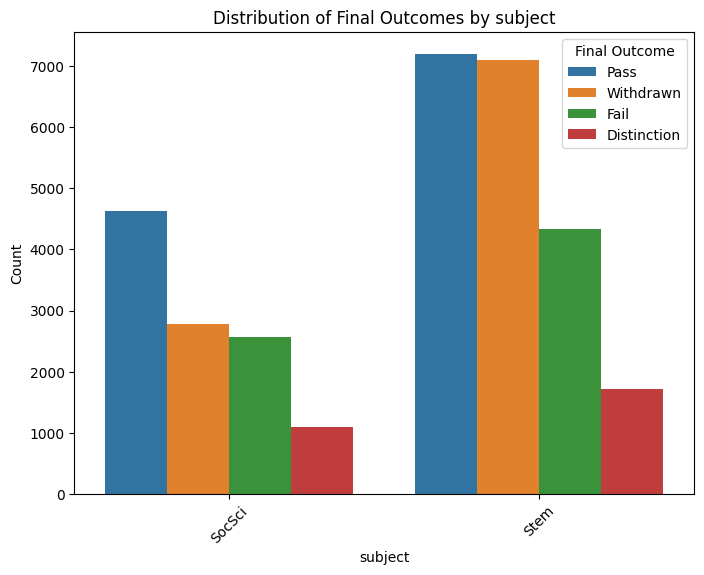

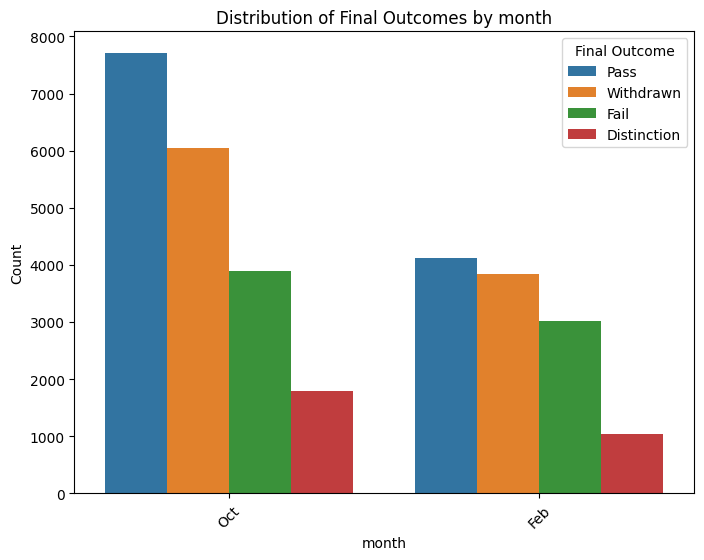

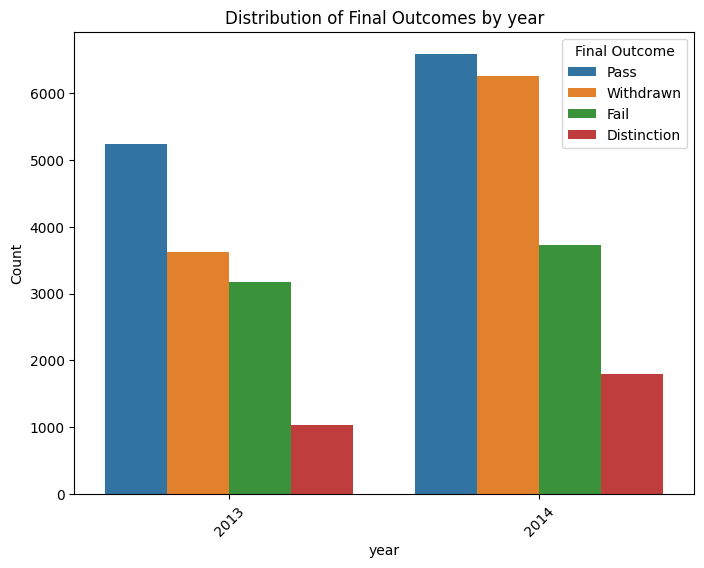

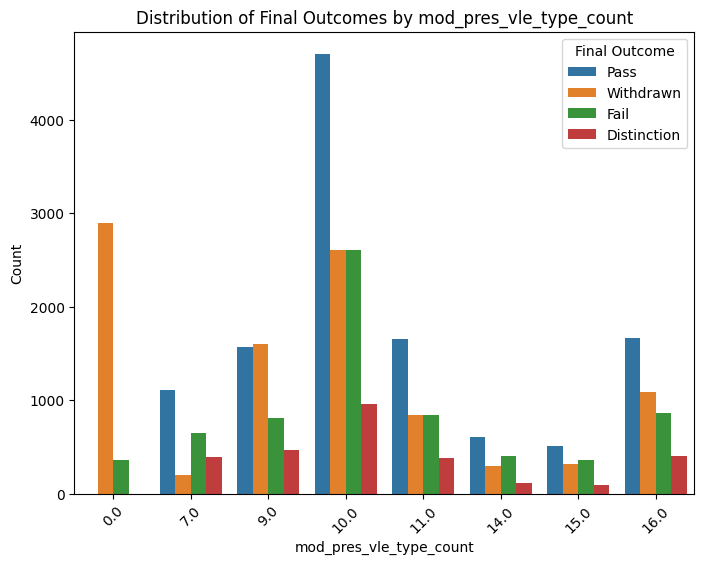

In [73]:

#  distributions by curriculum
curriculum = ['course_length', 'subject', 'month', 'year', 'mod_pres_vle_type_count']
for cur in curriculum:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=ou_student, x=cur, hue='final_result')
    plt.title(f'Distribution of Final Outcomes by {cur}')
    plt.xlabel(cur)
    plt.ylabel('Count')
    plt.legend(title='Final Outcome')
    plt.xticks(rotation=45)
    plt.show()


`course_length`

The courses are not signficantly different in length - ranging from 234 to 269 days.  There isn't anything particularly to be gained from this information - there are observations to be made but they are unlikely to be useful or statistically significant. 

`subject`

STEM students have a much higher proportion of withdrawals than Social Science students.  There are more STEM students in general. Social Science students have a higher proportion of distinctions. 

I will keep subject.

`month` 

This feature has been extracted from presentation.  There are two intakes per year - February and October.  The distributions are similar, but there are more students in the October intake.  The proportion of withdrawals is higher in the February intake.  The proportion of distinctions is higher in the October intake.  The proportion of passes is higher in the October intake.  The proportion of fails is higher in the February intake.

Given the imbalanced dataset - I will not be included intake month as a predictor, although it would be interesting to explore this further.

`year`

There is less data for 2013 than 2014.  There are more withdrawals in 2014 and the distributions are not the same.  This is interesting to note because my model is going to baseed on using 2013 data to predict 2014 students.  This is a limitation of the model.  It would be interesting to explore this further.  

`mod_pres_vle_type_count`

I created this feature but I don't think it is helpful.  It counts the number of different types of vle engagement per module presentation.  Since I am not including module_presentation as a feature, this will also be excluded.  I also do not think that it is trustworthy or meaningful information - this is my domain knowledge!

#### Academic / Enagement Behaviour

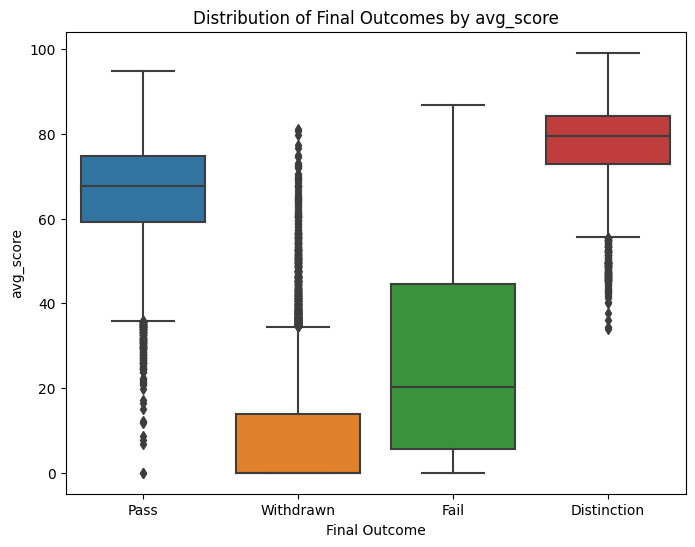

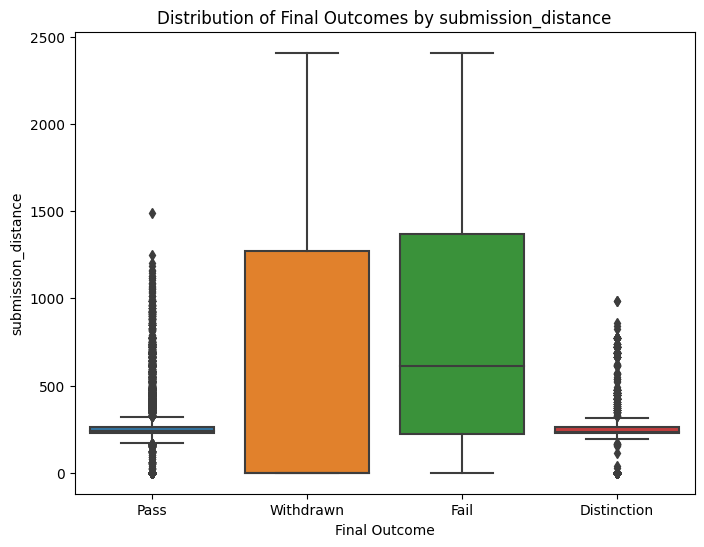

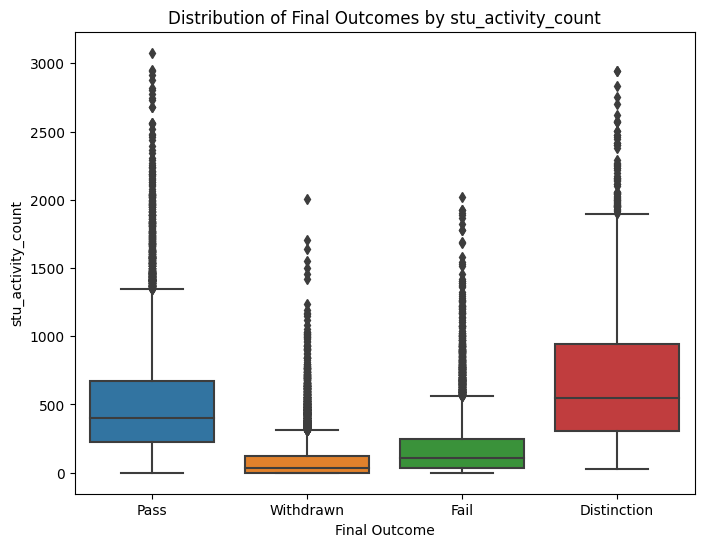

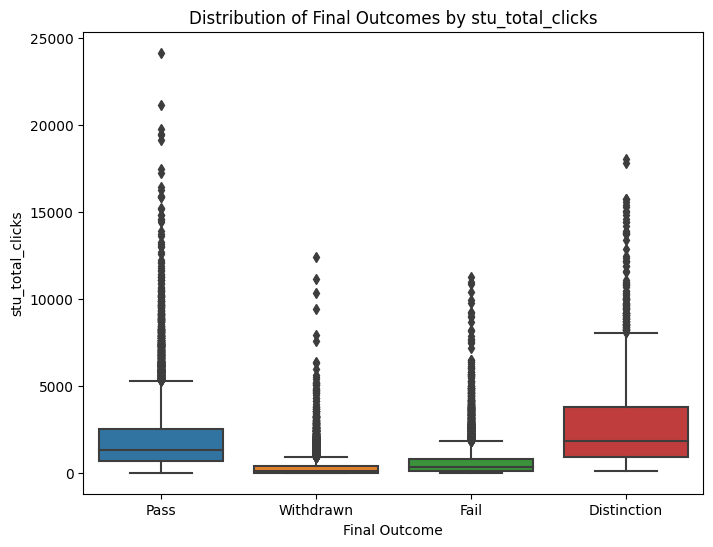

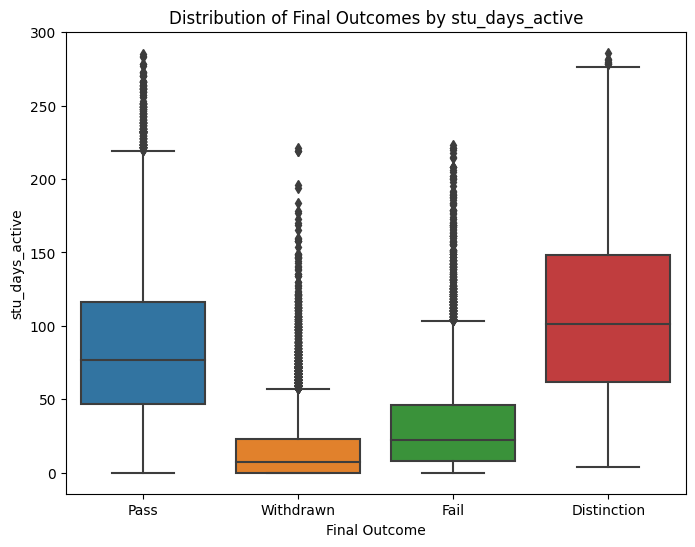

In [74]:

# distributions by academic behavior (learning analytics)
behavior = ['avg_score', 'submission_distance', 'stu_activity_count', 'stu_total_clicks', 'stu_days_active']
for beh in behavior:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=ou_student, x='final_result', y=beh)
    plt.title(f'Distribution of Final Outcomes by {beh}')
    plt.xlabel('Final Outcome')
    plt.ylabel(beh)
    plt.show()

`avg_score`

This is critical information to the model.  Because the OU assesses the student throughout the study period, it is likely to be a good indicator of outcome but also a proxy for engagement as some assessments do not count - that is, they are indicative and optional.  

It is clear that students who go on to pass and achieve a distinction have higher average scores at the end - and most likely throughout the course. Students who withdraw have the lowest mean scores.  Students who fail have higher means than withdrawn students - they attempt but do not attain a sufficiently high score to pass. 

`submission_distance`

This is a calculated feature which is the distance (in days) of the student's assessment submission from the due date.  We can see that passing and distinction students have very similar distances, whilst failing students have quite a higher mean.  Withdrawn students are very spread out.  This is interesting - it could be that withdrawn students are not submitting assessments at all, or that they are submitting them very early or very late.  This is something to explore further.

`student activity count`

This is a calculated feature which is the number of different types of vle activity which the student engaged with during the course.  Again, it is clear that passing and distinction students engage with more types which are available to engage with in comparison to withrawing and failing students.  

It may be that this (and other engagement features) are too similar and we will suffer from multicollinearity.  To be determined. 

`student total clicks`

This is simply the number of clicks by the student on the vle over their course.  For a distance learning HE institution, measuring vle clicks is probably the most useful measure for engagement, whilst a taught institution will have other measures or weight this differently.

`student active days`

This feature is calculated from the vle data - it is the sum of days where the student used the vle.  Whilst total clicks is total usage, this feature measures how regularly the student engages with the vle.  

These last two vle features have different distributions for the outcomes - it seems that withdrawn and failing students have lower means.  Of course, this is obvious for this dataset since withdrawn students stop engaging throughout the year.

#### Outcomes by module

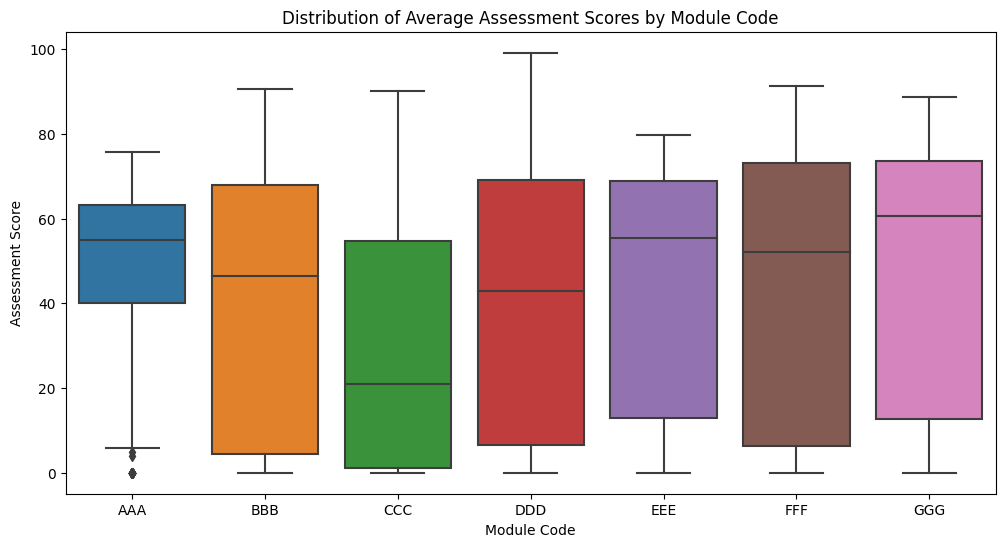

In [75]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=ou_student, x='code_module', y='avg_score')
plt.title('Distribution of Average Assessment Scores by Module Code')
plt.xlabel('Module Code')
plt.ylabel('Assessment Score')
plt.show()


There is a difference in average student assessment score by module.  This is interesting and provides different options and research questions which could be explored.  

For example - to what extent does the module (asssessment structure, marking regime, tutor, subject) impact the score and/or final result.  Should this be part of the model? Does each model need its own model?  Does the best overall model actually comprise of several models which are optimsed for each module or even module presentaiton combination? 

None of this will be explored in this assessment but may be future work.

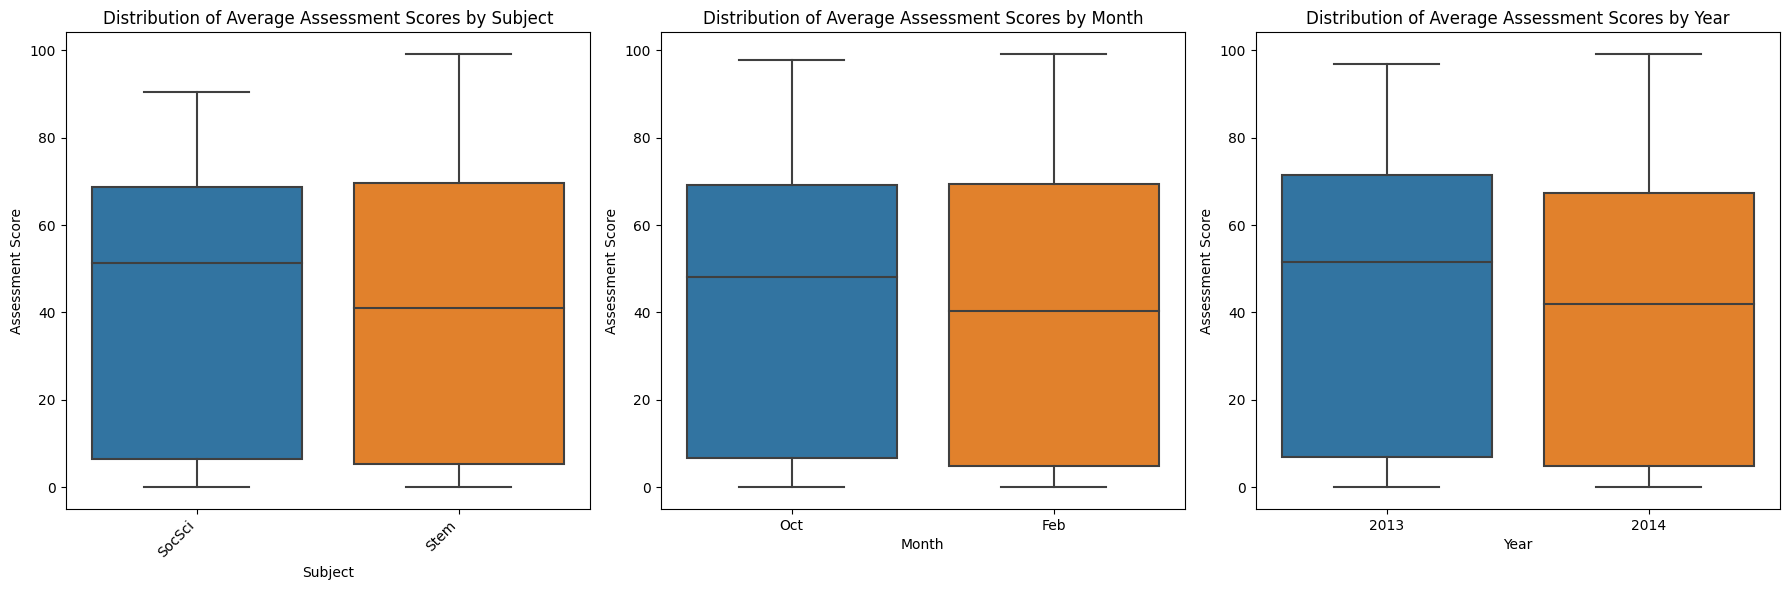

In [76]:
plt.figure(figsize=(18, 6))

# Plot 1: Distribution of Average Assessment Scores by Subject
plt.subplot(1, 3, 1)
sns.boxplot(data=ou_student, x='subject', y='avg_score')
plt.title('Distribution of Average Assessment Scores by Subject')
plt.xlabel('Subject')
plt.ylabel('Assessment Score')
plt.xticks(rotation=45, ha='right')

# Plot 2: Distribution of Average Assessment Scores by Month
plt.subplot(1, 3, 2)
sns.boxplot(data=ou_student, x='month', y='avg_score')
plt.title('Distribution of Average Assessment Scores by Month')
plt.xlabel('Month')
plt.ylabel('Assessment Score')

# Plot 3: Distribution of Average Assessment Scores by Year
plt.subplot(1, 3, 3)
sns.boxplot(data=ou_student, x='year', y='avg_score')
plt.title('Distribution of Average Assessment Scores by Year')
plt.xlabel('Year')
plt.ylabel('Assessment Score')

plt.tight_layout()
plt.show()




Similarly, there appear to be differences between subject, month (intake) and year.  

Are they systematic?  Are they significant?  

It is beyond the scope of this project, which is looking at different predictive models and assessing their performance, rather than creating the best predictive model for this scenario.  

<Figure size 1800x600 with 0 Axes>

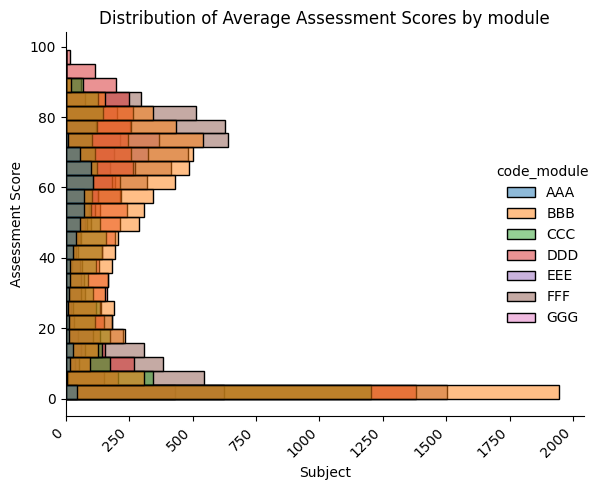

In [77]:
plt.figure(figsize=(18, 6))

# Plot 1: Distribution of Average Assessment Scores by Subject

sns.displot(data=ou_student,  y='avg_score', hue='code_module')
plt.title('Distribution of Average Assessment Scores by module')
plt.xlabel('Subject')
plt.ylabel('Assessment Score')
plt.xticks(rotation=45, ha='right')



plt.tight_layout()
plt.show()

#### Withdrawal dates



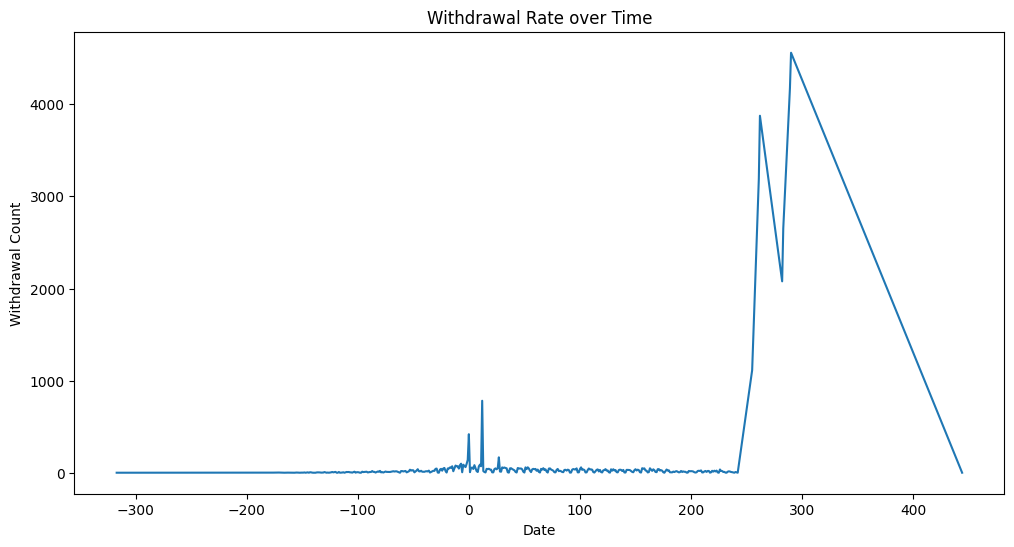

In [78]:
# withdrawals over time
plt.figure(figsize=(12, 6))
ou_student['date_unregistration'].value_counts().sort_index().plot()
plt.title('Withdrawal Rate over Time')
plt.xlabel('Date')
plt.ylabel('Withdrawal Count')
plt.show()


We can see that withdrawals happen through out the year.  There are certainly some extreme dates (early and late) which will be accounted for.

There's a spike just before the course starts, just after it has started and then throughout the course.  The last mountains are becausee I imputed a withdrawal date for all completing students (21 days after max course end date).


An institution would be interested in identifying the two early blips as well as withdrawals throughout the year and what they can do to prevent them.


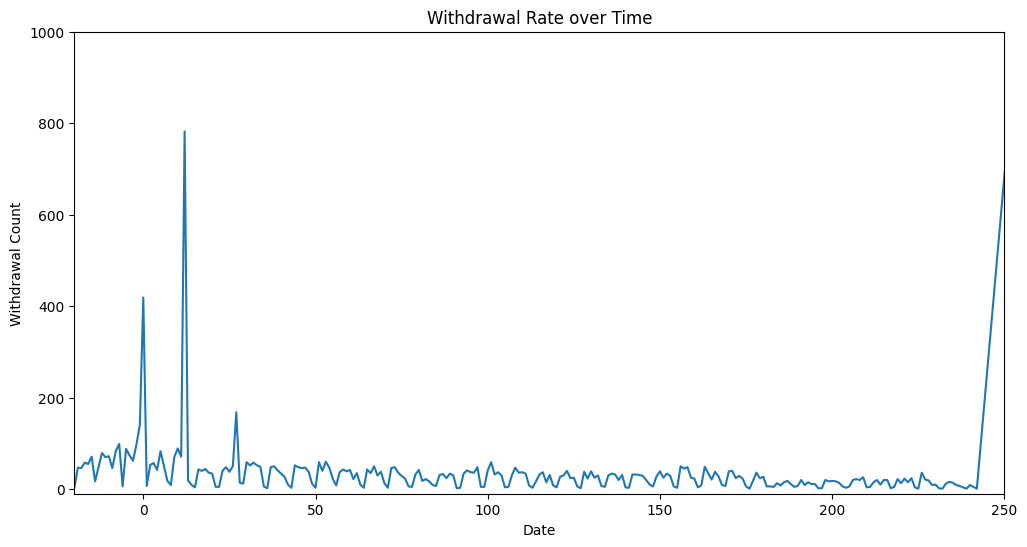

In [80]:
# withdrawals over time
plt.figure(figsize=(12, 6))
ou_student['date_unregistration'].value_counts().sort_index().plot()
plt.title('Withdrawal Rate over Time')
plt.xlabel('Date')
plt.ylabel('Withdrawal Count')
plt.xlim(-20, 250)  
plt.ylim(-10, 1000)
plt.show()


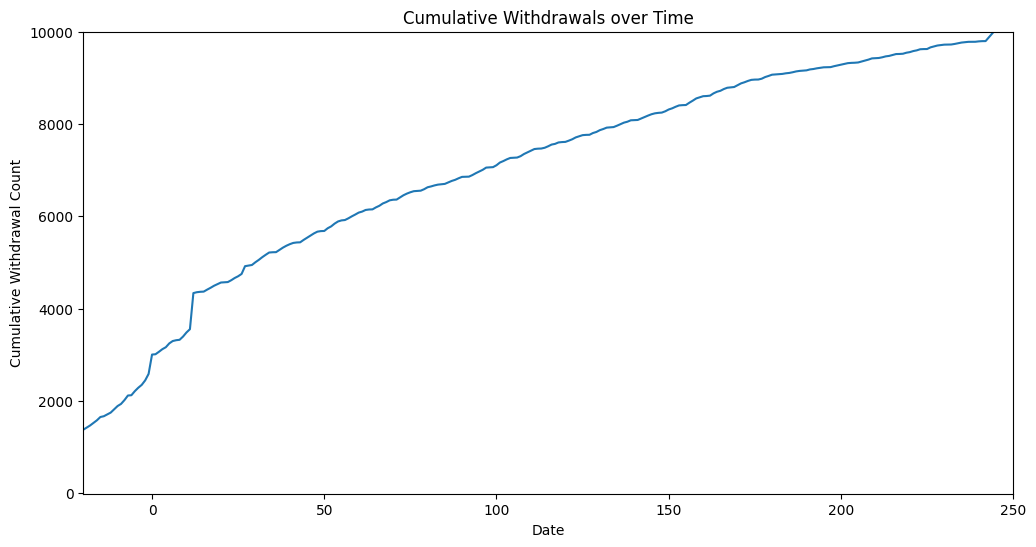

In [82]:
# cumulative withdrawals over time
plt.figure(figsize=(12, 6))
ou_student['date_unregistration'].value_counts().sort_index().cumsum().plot()
plt.title('Cumulative Withdrawals over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Withdrawal Count')
plt.xlim(-20, 250)  
plt.ylim(-10, 10000)
plt.show()


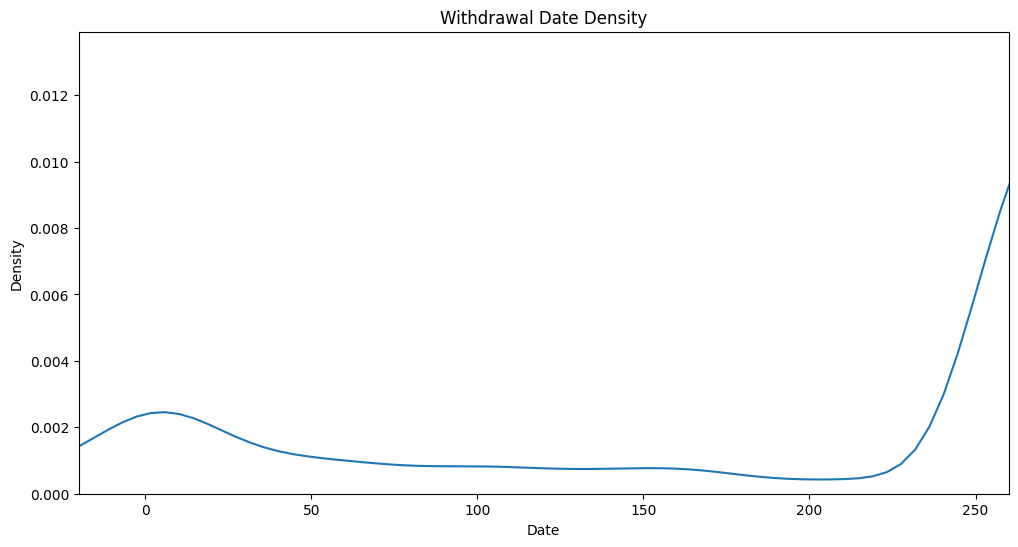

In [85]:
# withdrawal density
plt.figure(figsize=(12, 6))
sns.kdeplot(data=ou_student, x='date_unregistration')
plt.title('Withdrawal Date Density')
plt.xlabel('Date')
plt.ylabel('Density')
plt.xlim(-20, 260)  
plt.show()


Text(0.5, 1.0, 'Distribution of Withdrawal Dates')

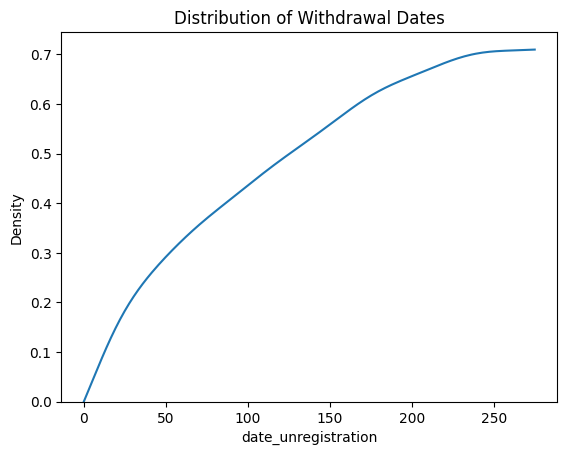

In [87]:
# kde plot of withdrawals
sns.kdeplot(data=ou_student[ou_student.final_result == 'Withdrawn'], x='date_unregistration', 
            clip = (0,275), cumulative = True).set_title('Distribution of Withdrawal Dates')

The different plots of withdrawal date are interesting.  They would help determine different prediction points - i.e. when to target students who are likely to withdraw or are predicted to fail. 

For example, but day 50 about 30% of withdrawals have happened.

#### Withdrawal by Module Code

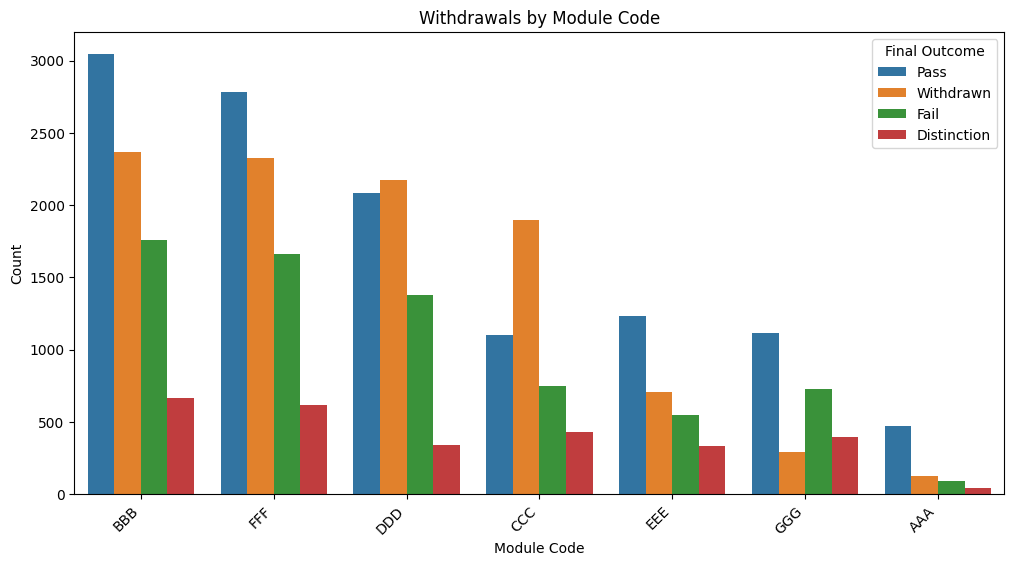

In [86]:
# withdrawals by module code
plt.figure(figsize=(12, 6))
sns.countplot(data=ou_student, x='code_module', hue='final_result', order=ou_student['code_module'].value_counts().index)
plt.title('Withdrawals by Module Code')
plt.xlabel('Module Code')
plt.ylabel('Count')
plt.legend(title='Final Outcome')
plt.xticks(rotation=45, ha='right')
plt.show()


There are definite differences between module codes in terms of withdrawal as an outcome.  Module CCC has significantly higher proportion of withdrawn students as an outcome, for example.  Where as GGG has a low proportion of witdrawn students but high proportions of passing and failing studnets.  

This is interesting and could be explored further.  It is beyond the scope of this project.

#### VLE by Module Code

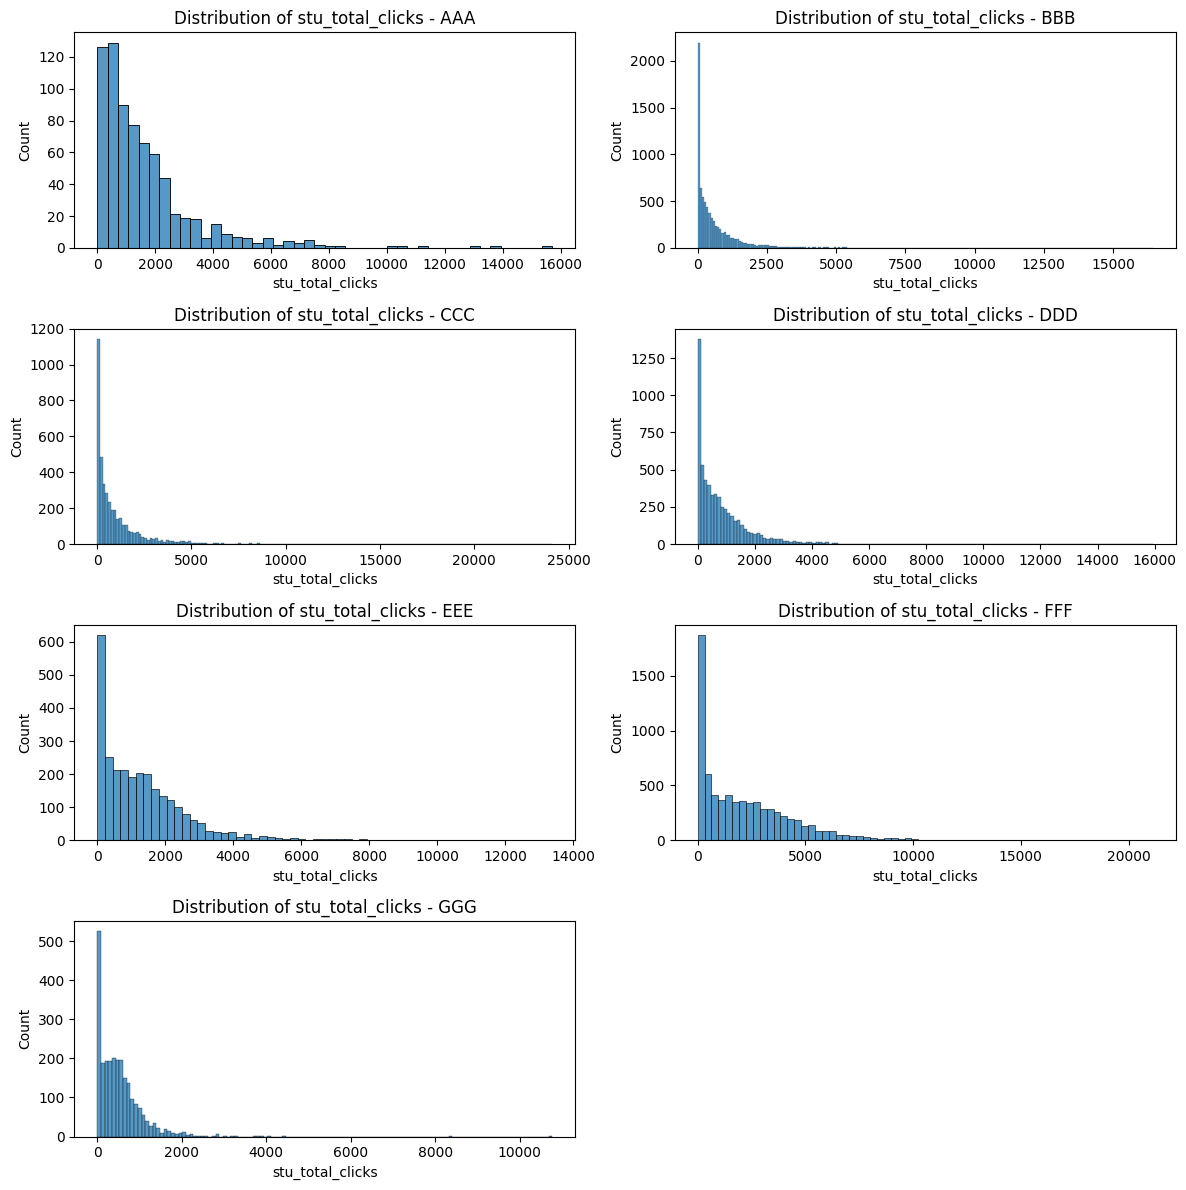

In [89]:

# unique code_module values
code_modules = ou_student['code_module'].unique()

# number of rows and columns for the subplot grid
n_rows = 4
n_cols = 2

# subplot grid, figure size
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 12))

# flatten the axes array for iterating
axes = axes.flatten()

# iterate over the code_modules and plot the distributions
for i, module in enumerate(code_modules):
    # data for the current code_module
    data = ou_student.loc[ou_student['code_module'] == module, 'stu_total_clicks']
    
    # axis for the current subplot
    ax = axes[i]
    
    # distribution for the current code_module
    sns.histplot(data=data, ax=ax)
    
    # title and labels
    ax.set_title(f'Distribution of stu_total_clicks - {module}')
    ax.set_xlabel('stu_total_clicks')
    ax.set_ylabel('Count')

# hide any extra subplots 
if len(code_modules) < len(axes):
    for j in range(len(code_modules), len(axes)):
        axes[j].axis('off')

# tight layout
plt.tight_layout()

# show  
plt.show()

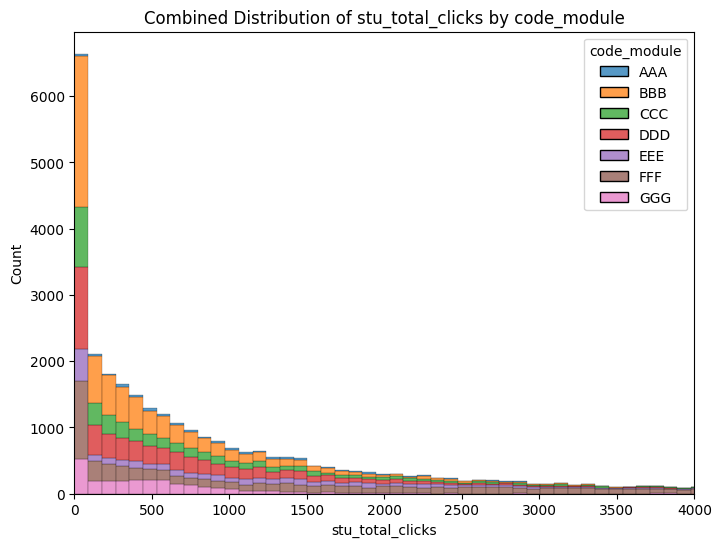

In [92]:

# combined distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=ou_student, x='stu_total_clicks', hue='code_module', multiple='stack')
plt.title('Combined Distribution of stu_total_clicks by code_module')
plt.xlabel('stu_total_clicks')
plt.ylabel('Count')
plt.xlim(0, 4000)

# show
plt.show()


The above plots show that the vle usage of students is different between students. 

Again - this is interesting and will affect the model, but it is beyond the scope of this project. 

#### Assessment Score by Module Code

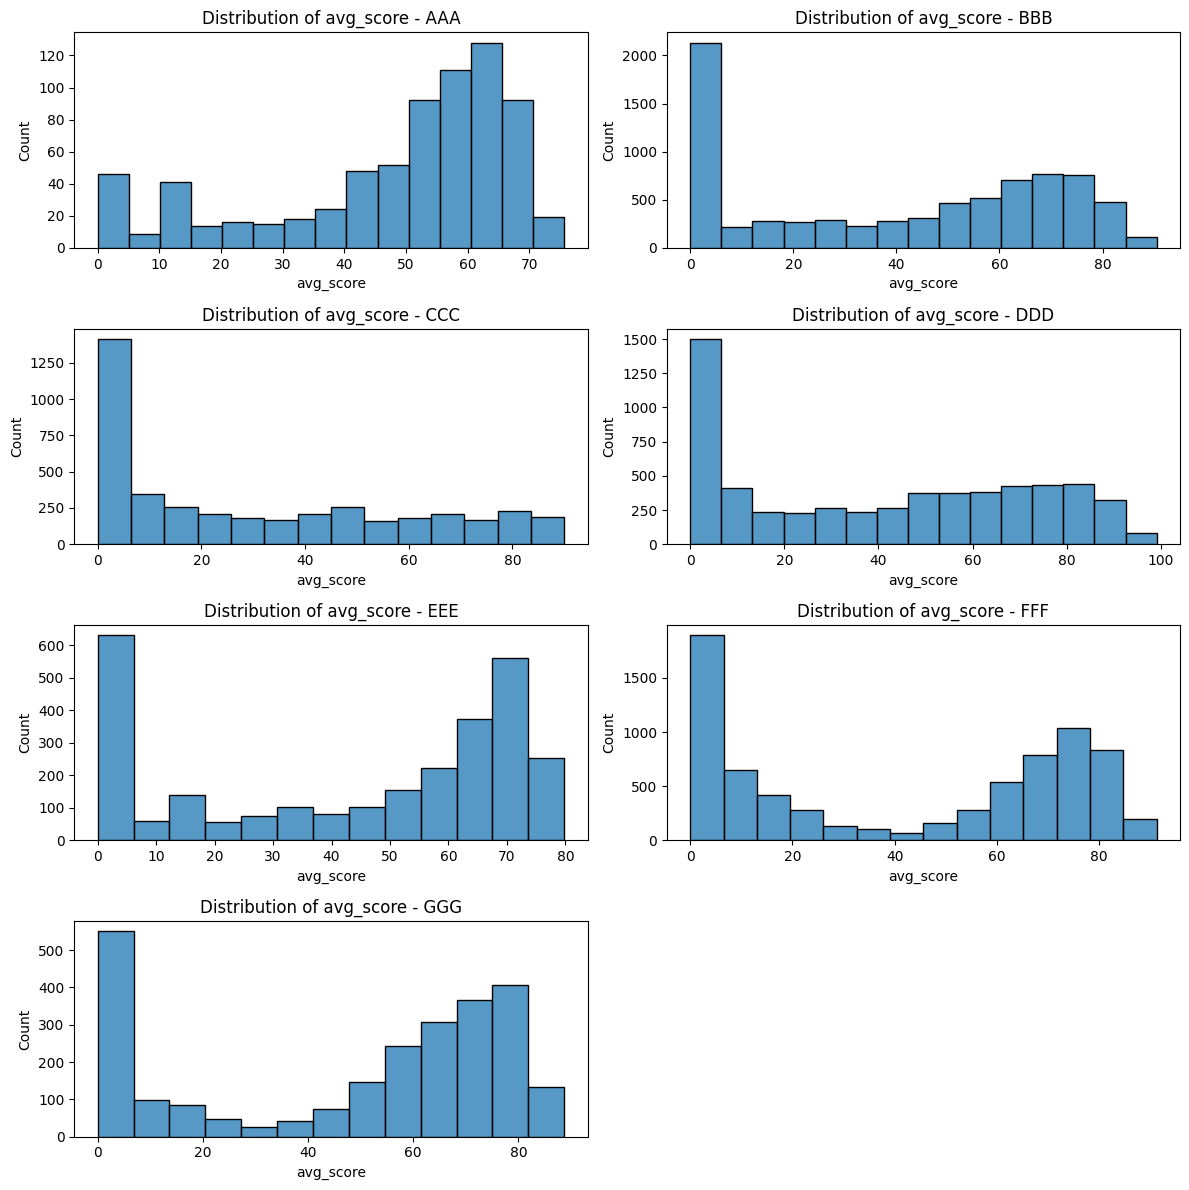

In [93]:

# unique code_module values
code_modules = ou_student['code_module'].unique()

# number of rows and columns for the subplot grid
n_rows = 4
n_cols = 2

# subplot grid, figure size
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 12))

# flatten the axes array for iterating
axes = axes.flatten()

# iterate over the code_modules and plot the distributions
for i, module in enumerate(code_modules):
    # data for the current code_module
    data = ou_student.loc[ou_student['code_module'] == module, 'avg_score']
    
    # axis for the current subplot
    ax = axes[i]
    
    # distribution for the current code_module
    sns.histplot(data=data, ax=ax)
    
    # title and labels
    ax.set_title(f'Distribution of avg_score - {module}')
    ax.set_xlabel('avg_score')
    ax.set_ylabel('Count')

# hide any extra subplots 
if len(code_modules) < len(axes):
    for j in range(len(code_modules), len(axes)):
        axes[j].axis('off')

# tight layout
plt.tight_layout()

# show  
plt.show()

Further evidence that module code is important - because there are differences between the datasets.  Modules AAA, EEE, FFF, and GGG are probalby the more traditional shapes (if we disregard the 0s), whilst CCC and DDD are quite flat across all scores.  

I am now leaning towards a regular train/test split instead of splitting on 2013/2014.